In [3]:
import numpy as np
import pandas as pd

In [38]:
#Read csv
df_2022 = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Science/Project/COVID19_Influence_on_Mobility_Patterns_Group2_Fall2023/data/2022_US_Region_Mobility_Report.csv")
df_2021 = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Science/Project/COVID19_Influence_on_Mobility_Patterns_Group2_Fall2023/data/2021_US_Region_Mobility_Report.csv")
df_2020 = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Science/Project/COVID19_Influence_on_Mobility_Patterns_Group2_Fall2023/data/2020_US_Region_Mobility_Report.csv")

print(df_2022.shape)
print(df_2021.shape)
print(df_2020.shape)

(747969, 15)
(951960, 15)
(812065, 15)


In [11]:
df_2020.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [8]:
#Check null values in specific columns
print(df_2022.isnull().sum())
print(df_2021.isnull().sum())
print(df_2020.isnull().sum())


country_region_code                                        0
country_region                                             0
sub_region_1                                             288
sub_region_2                                           14976
metro_area                                            747969
iso_3166_2_code                                       733281
census_fips_code                                       15181
place_id                                                   0
date                                                       0
retail_and_recreation_percent_change_from_baseline    267072
grocery_and_pharmacy_percent_change_from_baseline     321483
parks_percent_change_from_baseline                    563784
transit_stations_percent_change_from_baseline         461675
workplaces_percent_change_from_baseline                 9070
residential_percent_change_from_baseline              280514
dtype: int64
country_region_code                                        0
country_reg

# Merging the 3 datasets

In [39]:
# Concatenating the dataframes one below the other (since they all have the same columns)
df_combined = pd.concat([df_2020, df_2021, df_2022], ignore_index=True)

print(df_combined.shape)


(2511994, 15)


In [35]:
print(df_combined.isnull().sum())

country_region_code                                         0
country_region                                              0
sub_region_1                                              974
sub_region_2                                            50648
metro_area                                            2511994
iso_3166_2_code                                       2462320
census_fips_code                                        51318
place_id                                                    0
date                                                        0
retail_and_recreation_percent_change_from_baseline     882461
grocery_and_pharmacy_percent_change_from_baseline     1053400
parks_percent_change_from_baseline                    1891931
transit_stations_percent_change_from_baseline         1551397
workplaces_percent_change_from_baseline                 44003
residential_percent_change_from_baseline              1020635
dtype: int64


In [40]:
#Drop columns with large percentage of missing values
threshold = 0.20
df_combined = df_combined.dropna(thresh=len(df_combined) * threshold, axis=1)

In [41]:
print(df_combined.isnull().sum())

country_region_code                                         0
country_region                                              0
sub_region_1                                              974
sub_region_2                                            50648
census_fips_code                                        51318
place_id                                                    0
date                                                        0
retail_and_recreation_percent_change_from_baseline     882461
grocery_and_pharmacy_percent_change_from_baseline     1053400
parks_percent_change_from_baseline                    1891931
transit_stations_percent_change_from_baseline         1551397
workplaces_percent_change_from_baseline                 44003
residential_percent_change_from_baseline              1020635
dtype: int64


In [42]:
# For numerical data, let's fill with the median
numerical_columns = ['retail_and_recreation_percent_change_from_baseline', 
                     'parks_percent_change_from_baseline',
                     'transit_stations_percent_change_from_baseline',
                     'grocery_and_pharmacy_percent_change_from_baseline', 
                     'workplaces_percent_change_from_baseline',
                     'residential_percent_change_from_baseline']

for column in numerical_columns:
    median_value = df_combined[column].median()
    df_combined[column].fillna(median_value, inplace=True)

In [43]:
print(df_combined.isnull().sum())

country_region_code                                       0
country_region                                            0
sub_region_1                                            974
sub_region_2                                          50648
census_fips_code                                      51318
place_id                                                  0
date                                                      0
retail_and_recreation_percent_change_from_baseline        0
grocery_and_pharmacy_percent_change_from_baseline         0
parks_percent_change_from_baseline                        0
transit_stations_percent_change_from_baseline             0
workplaces_percent_change_from_baseline                   0
residential_percent_change_from_baseline                  0
dtype: int64


In [44]:
# For categorical data, we will fill it with mode
categorical_columns = ['sub_region_1', 'sub_region_2', 'census_fips_code']

for column in categorical_columns:
    if column in df_combined.columns:
        mode_value = df_combined[column].mode()[0]
        df_combined[column].fillna(mode_value, inplace=True)

In [45]:
print(df_combined.isnull().sum())
#With this missing values are processed

country_region_code                                   0
country_region                                        0
sub_region_1                                          0
sub_region_2                                          0
census_fips_code                                      0
place_id                                              0
date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64


In [46]:
print(len(df_combined))

2511994


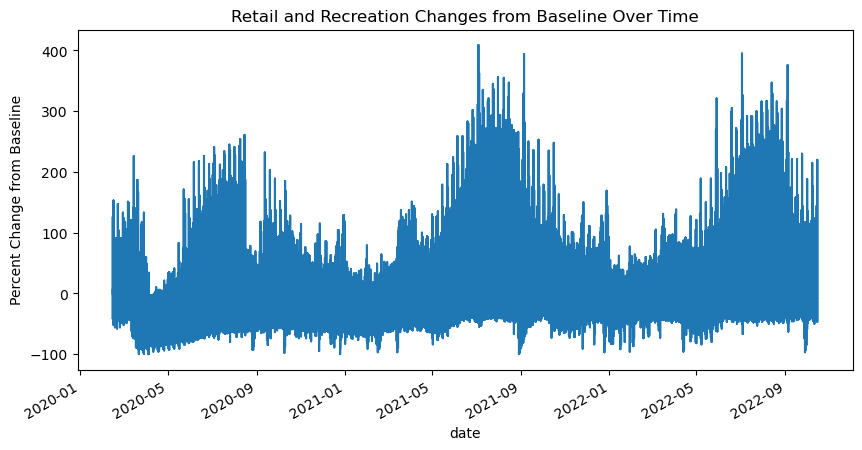

In [47]:
import matplotlib.pyplot as plt

# Convert date to datetime
df_combined['date'] = pd.to_datetime(df_combined['date'])

# Set the date as the index
df_combined.set_index('date', inplace=True)

# Plotting changes over time for retail and recreation
df_combined['retail_and_recreation_percent_change_from_baseline'].plot(figsize=(10,5))
plt.title('Retail and Recreation Changes from Baseline Over Time')
plt.ylabel('Percent Change from Baseline')
plt.show()


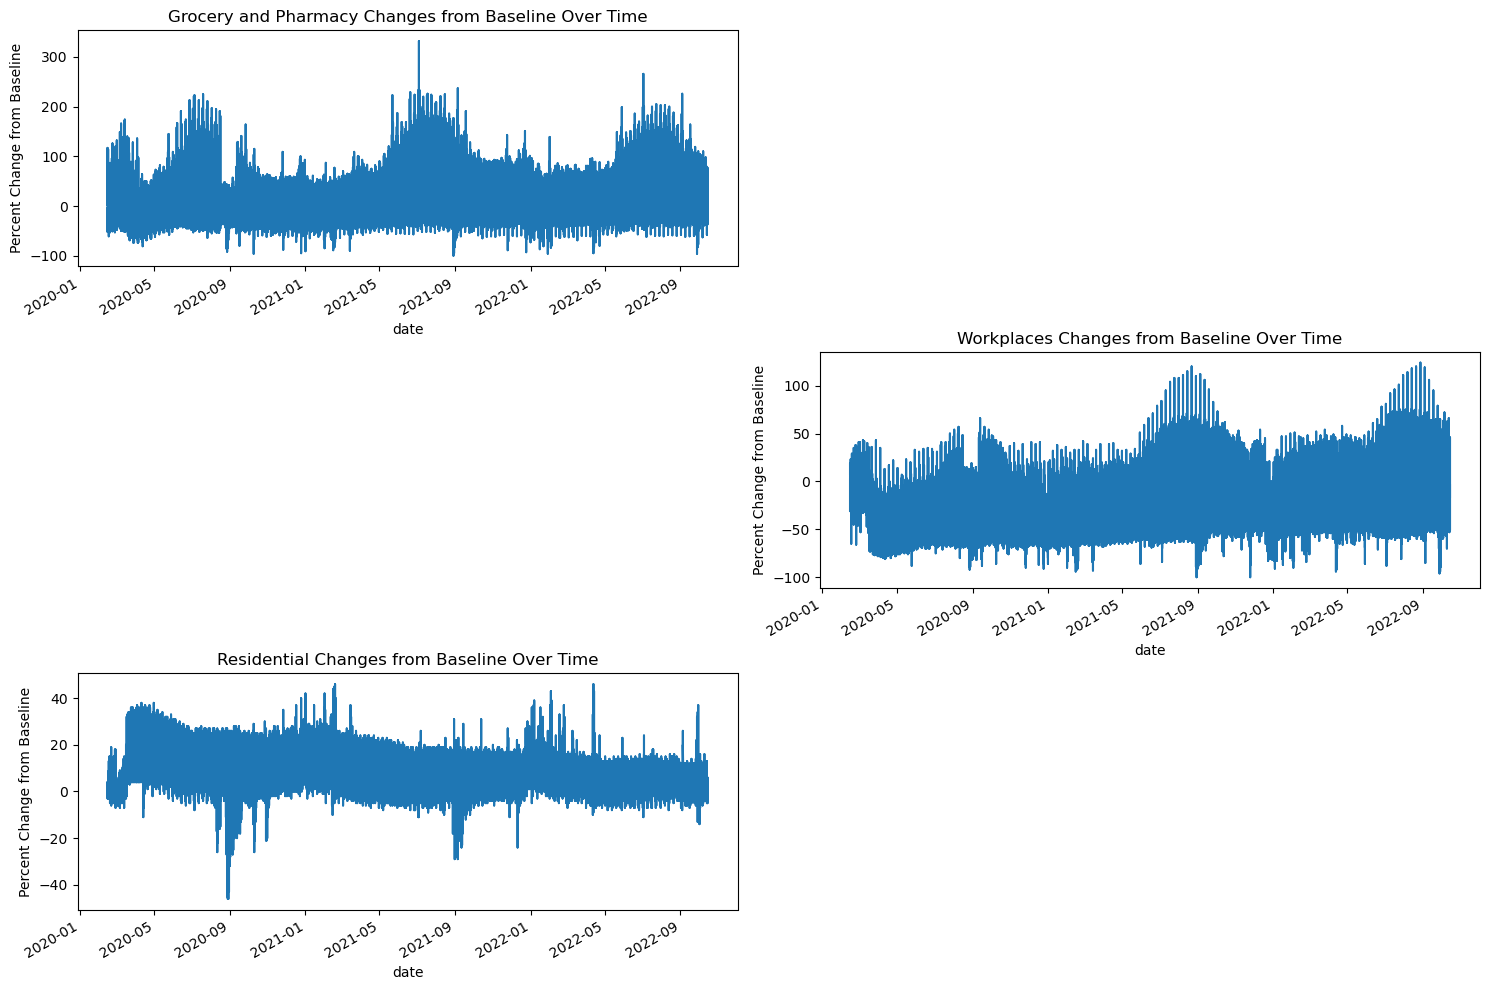

In [30]:
# Plot settings
plt.figure(figsize=(15, 10))

# Plot for grocery and pharmacy
plt.subplot(3, 2, 1)
df_combined['grocery_and_pharmacy_percent_change_from_baseline'].plot()
plt.title('Grocery and Pharmacy Changes from Baseline Over Time')
plt.ylabel('Percent Change from Baseline')

# Plot for workplaces
plt.subplot(3, 2, 4)
df_combined['workplaces_percent_change_from_baseline'].plot()
plt.title('Workplaces Changes from Baseline Over Time')
plt.ylabel('Percent Change from Baseline')

# Plot for residential
plt.subplot(3, 2, 5)
df_combined['residential_percent_change_from_baseline'].plot()
plt.title('Residential Changes from Baseline Over Time')
plt.ylabel('Percent Change from Baseline')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()


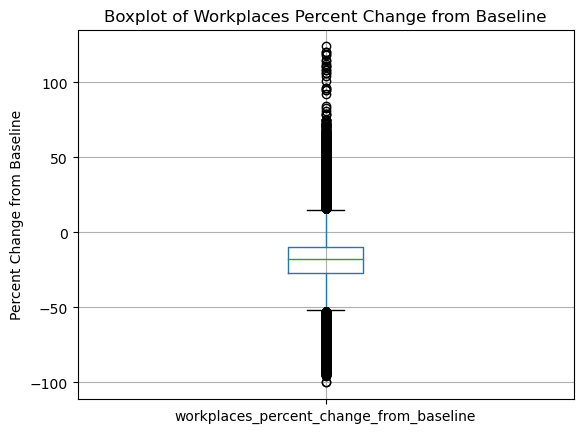

In [31]:
# Boxplot for Workplaces percent change
df_combined.boxplot(column='workplaces_percent_change_from_baseline')
plt.title('Boxplot of Workplaces Percent Change from Baseline')
plt.ylabel('Percent Change from Baseline')
plt.show()


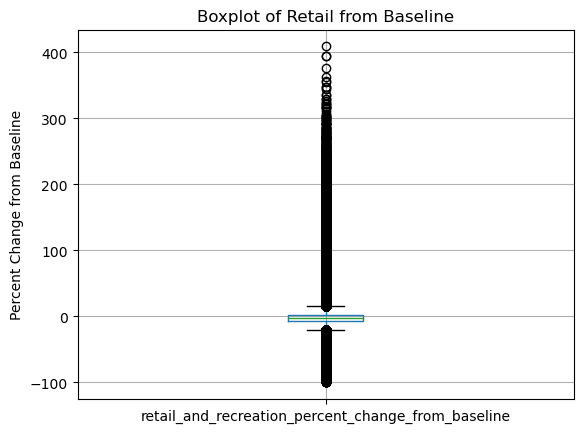

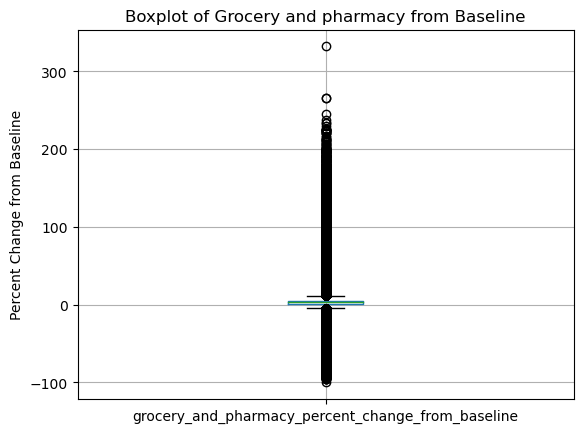

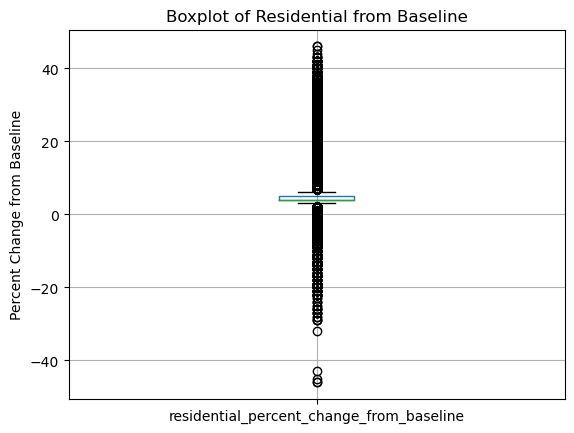

In [32]:
df_combined.boxplot(column='retail_and_recreation_percent_change_from_baseline')
plt.title('Boxplot of Retail from Baseline')
plt.ylabel('Percent Change from Baseline')
plt.show()

df_combined.boxplot(column='grocery_and_pharmacy_percent_change_from_baseline')
plt.title('Boxplot of Grocery and pharmacy from Baseline')
plt.ylabel('Percent Change from Baseline')
plt.show()

df_combined.boxplot(column='residential_percent_change_from_baseline')
plt.title('Boxplot of Residential from Baseline')
plt.ylabel('Percent Change from Baseline')
plt.show()

# Correlation map

/var/folders/53/7qt84sld6sd0jmn84d2_x55w0000gn/T/ipykernel_20370/3141043366.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combined.corr()


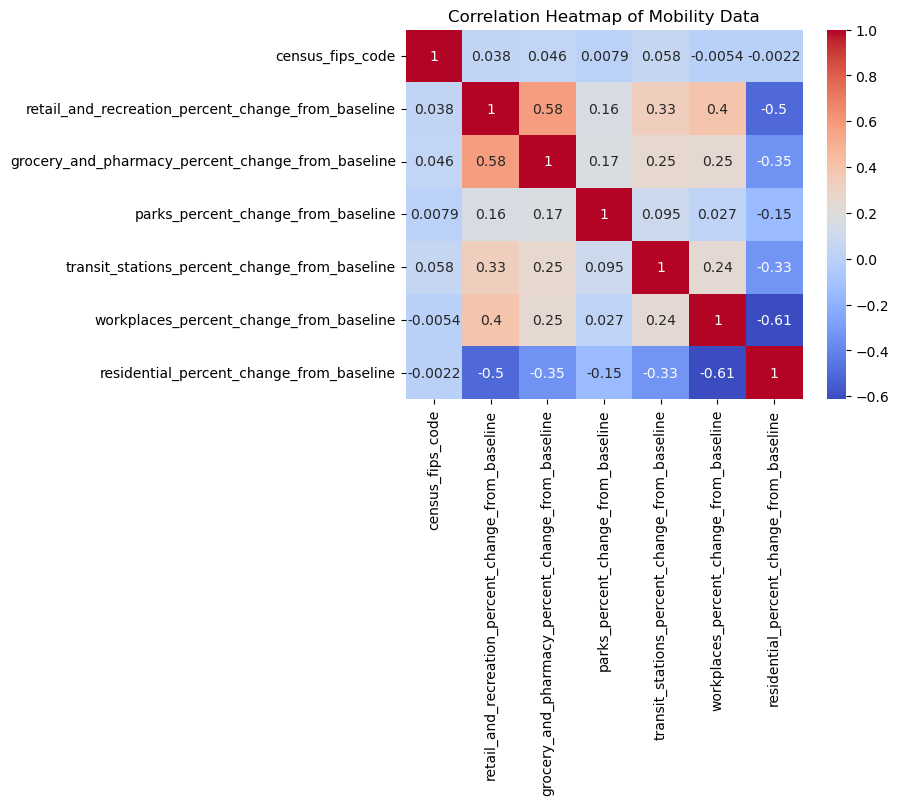

In [48]:
import seaborn as sns

correlation_matrix = df_combined.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Mobility Data')
plt.show()


# Scatter Plot

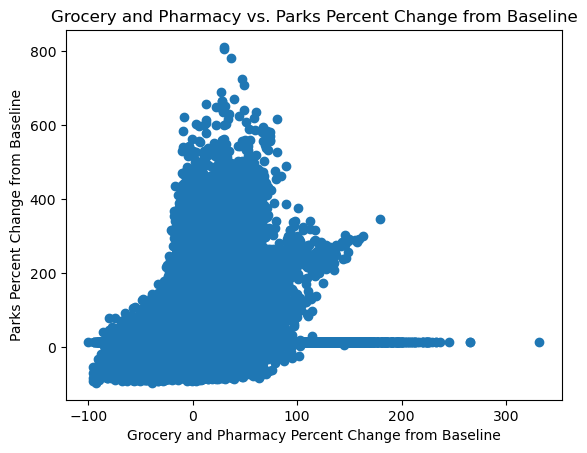

In [49]:
#Between Grocery and Pharmacy and Parks percent changes
plt.scatter(df_combined['grocery_and_pharmacy_percent_change_from_baseline'], df_combined['parks_percent_change_from_baseline'])
plt.title('Grocery and Pharmacy vs. Parks Percent Change from Baseline')
plt.xlabel('Grocery and Pharmacy Percent Change from Baseline')
plt.ylabel('Parks Percent Change from Baseline')
plt.show()


# Pair Plots

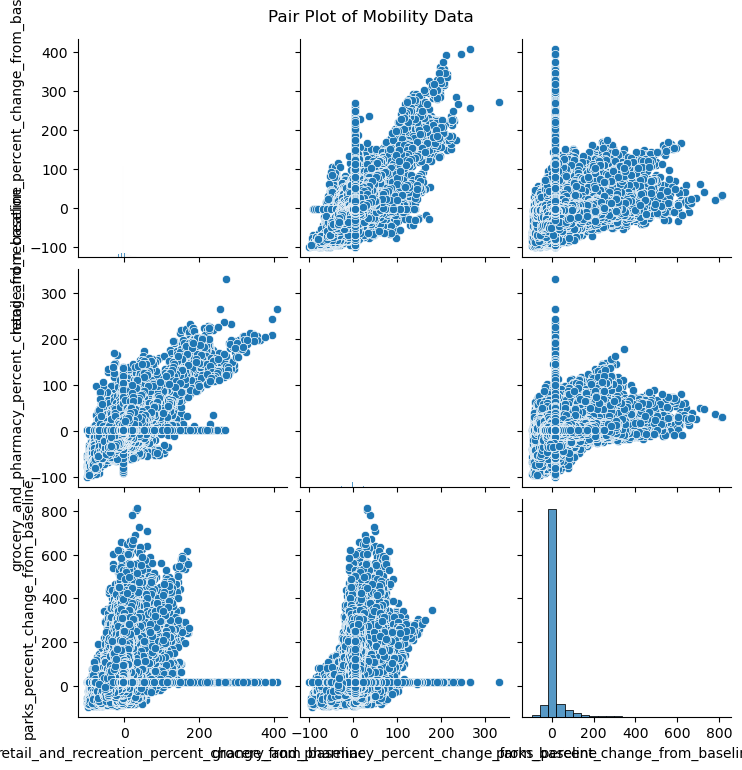

In [50]:
sns.pairplot(df_combined[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline']])
plt.suptitle('Pair Plot of Mobility Data', y=1.02)
plt.show()


# Density Plot

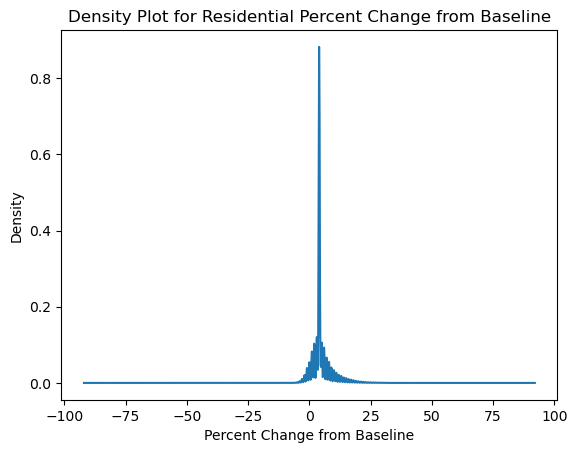

In [51]:
df_combined['residential_percent_change_from_baseline'].plot(kind='density')
plt.title('Density Plot for Residential Percent Change from Baseline')
plt.xlabel('Percent Change from Baseline')
plt.show()
